# MONTE CARLO DROPOUT
Incerteza Epistêmica em Redes Neurais - Gerson Eduardo de Mello 

Esta é uma aplicação do método de incerteza em redes neurais proposto por Yarin Gal. O Dataset escolhido foi O 
Airfoil Self-Noise Data Set (http://archive.ics.uci.edu/ml/datasets/Airfoil+Self-Noise ) retirado do UCL Machine Learn Repository. A variável predita escolhida foi a "Pressure" e todas as demais foram consideradas como variáveis preditoras. 

#Descrição do método proposto por Yarin Gal: 

Em 2015, Yarin Gal mostrou que é possível obter incerteza a partir de redes neurais quase que gratuitamente, se olhássemos técnicas de regularização estocásticas, como Dropout, sob uma perspectiva Bayesiana. Dropout (Srivastava et al, 2014) é uma técnica utilizada na maioria das redes neurais modernas para prevenir sobre-ajustamento. Durante o treinamento, Dropout funciona zerando aleatoriamente uma percentagens de neurônios nas camadas da rede neural. No momento de fazer previsões, todos os neurônios são mantidos e a rede neural atua como uma grande mistura de sub-redes menores.
Durante o treinamento do modelo, nada muda; mas, durante o teste mantemos a probabilidade de Dropout fixada durante o treino e realizamos T  forward-pass pela rede, coletando assim T  previsões y para cada amostra. Assim para cada ponto teremos uma previsão para a média e uma previsão para a variância, que será nossa medida de incerteza.
 

In [389]:
# Importando as bibliotecas necessárias para importação dos datasets

In [390]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
%reload_ext autoreload
%autoreload 2


In [391]:
# importando os dados  

In [392]:
df=pd.read_csv('airfoil.csv')

In [393]:
df

,Frequency,Angle,Length,Velocity,Suction Side,Pressure
0,800,0.0,0.3048,71.3,0.002663,126.201
1,1000,0.0,0.3048,71.3,0.002663,125.201
2,1250,0.0,0.3048,71.3,0.002663,125.951
3,1600,0.0,0.3048,71.3,0.002663,127.591
4,2000,0.0,0.3048,71.3,0.002663,127.461
...,...,...,...,...,...,...
1498,2500,15.6,0.1016,39.6,0.052849,110.264
1499,3150,15.6,0.1016,39.6,0.052849,109.254
1500,4000,15.6,0.1016,39.6,0.052849,106.604
1501,5000,15.6,0.1016,39.6,0.052849,106.224


In [394]:
df.describe()

,Frequency,Angle,Length,Velocity,Suction Side,Pressure
count,1503.000000,1503.000000,1503.000000,1503.000000,1503.000000,1503.000000
mean,2886.380572,6.782302,0.136548,50.860745,0.011140,124.835943
std,3152.573137,5.918128,0.093541,15.572784,0.013150,6.898657
min,200.000000,0.000000,0.025400,31.700000,0.000401,103.380000
25%,800.000000,2.000000,0.050800,39.600000,0.002535,120.191000
50%,1600.000000,5.400000,0.101600,39.600000,0.004957,125.721000
75%,4000.000000,9.900000,0.228600,71.300000,0.015576,129.995500
max,20000.000000,22.200000,0.304800,71.300000,0.058411,140.987000


Avaliando a distribuição dos dados para avaliar qual o melhor tratamento estatístico para os dados. Caso as distribuições sejam aproximadamente normaisos dados serão padronizados. Caso contrário os dados serão normalizados. 


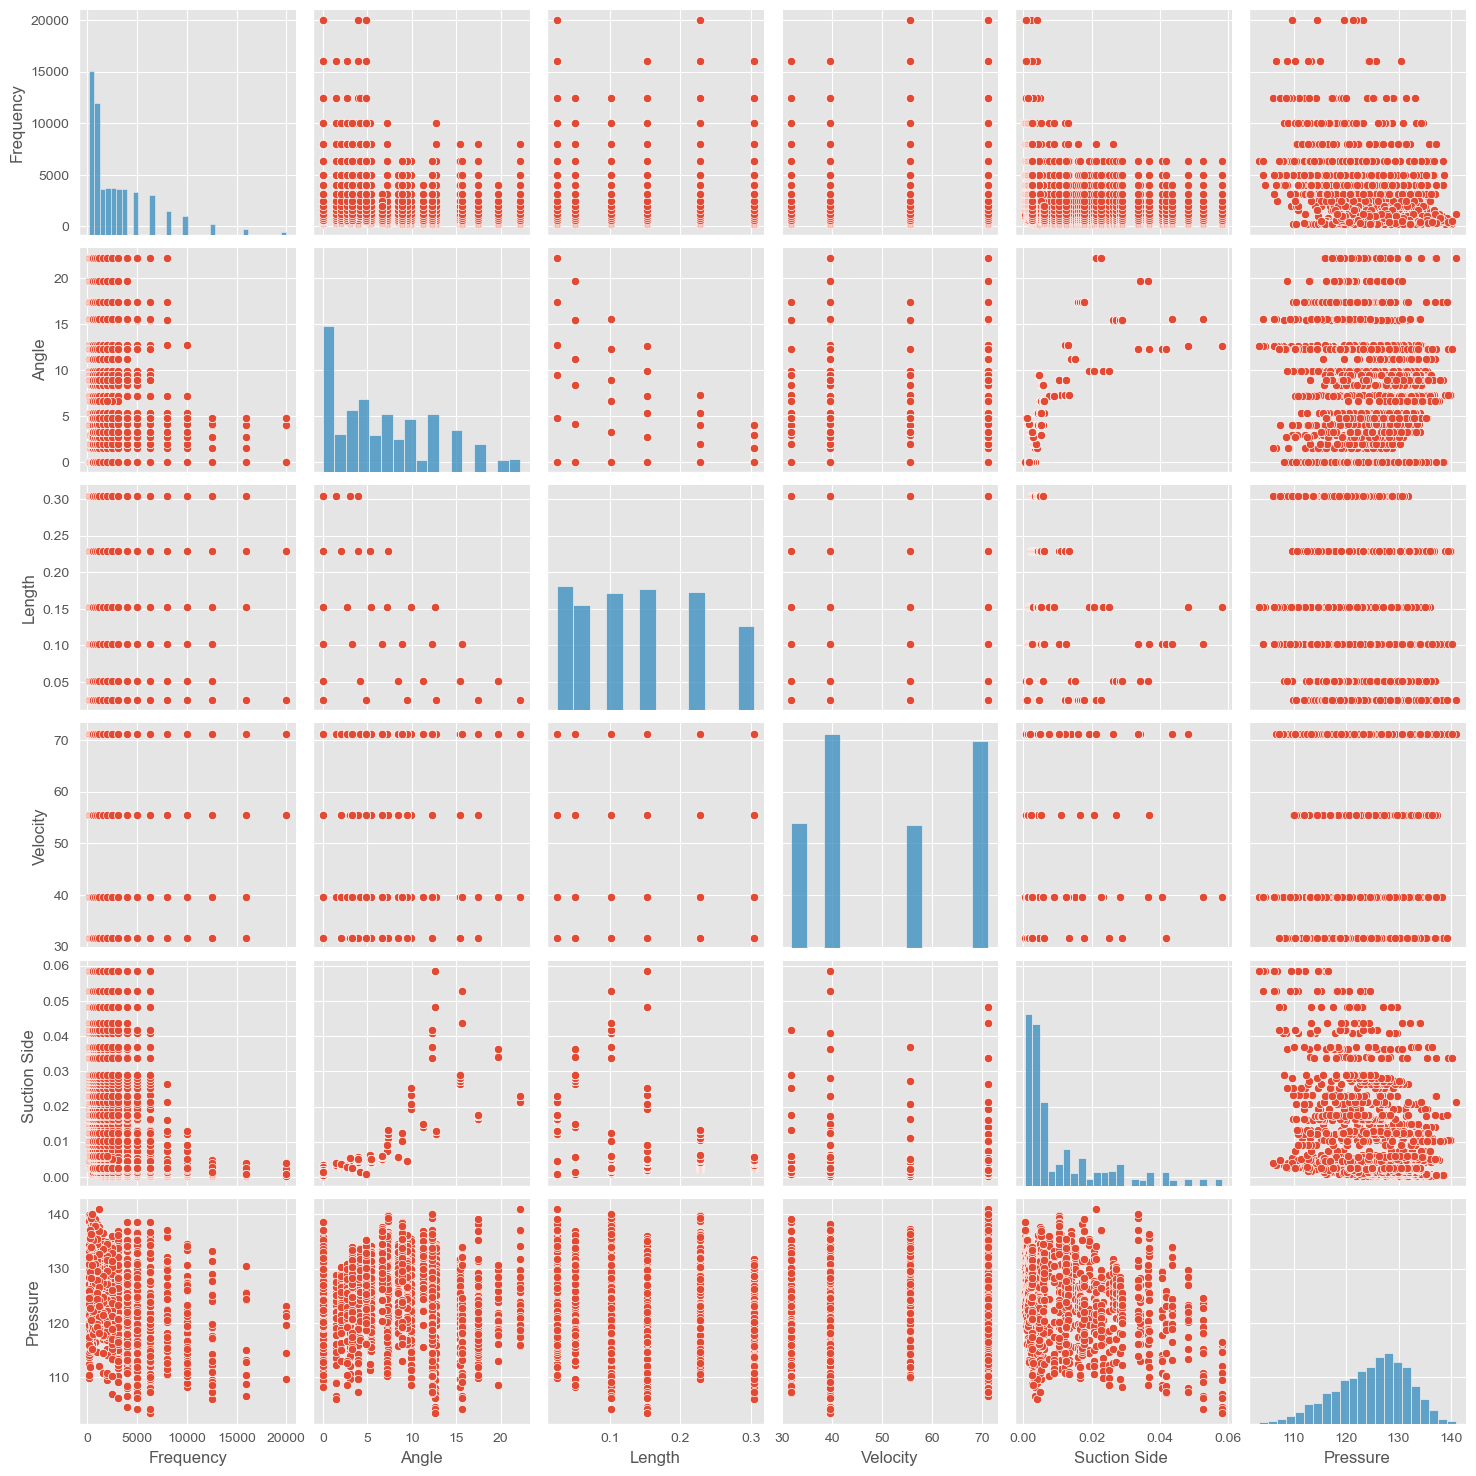

In [395]:
sns.pairplot(df,)# mostra todos os pares de vaariáveis e os histogramas 

Após a avaliação da distribuição dos dados para cada uma das variáveis, pode-se aplicar a normalização que é a mais apropriada do que a padronização uma vez que oas distribuições não seguem uma normalidade

In [396]:
from sklearn.preprocessing import MinMaxScaler 

In [397]:
df


,Frequency,Angle,Length,Velocity,Suction Side,Pressure
0,800,0.0,0.3048,71.3,0.002663,126.201
1,1000,0.0,0.3048,71.3,0.002663,125.201
2,1250,0.0,0.3048,71.3,0.002663,125.951
3,1600,0.0,0.3048,71.3,0.002663,127.591
4,2000,0.0,0.3048,71.3,0.002663,127.461
...,...,...,...,...,...,...
1498,2500,15.6,0.1016,39.6,0.052849,110.264
1499,3150,15.6,0.1016,39.6,0.052849,109.254
1500,4000,15.6,0.1016,39.6,0.052849,106.604
1501,5000,15.6,0.1016,39.6,0.052849,106.224


In [398]:
scaler=MinMaxScaler(feature_range=(0,1))
df_n = scaler.fit_transform(df)
print(df_n)

[[0.03030303 0.         1.         1.         0.03900472 0.60682852]
 [0.04040404 0.         1.         1.         0.03900472 0.58023772]
 [0.0530303  0.         1.         1.         0.03900472 0.60018082]
 ...
 [0.19191919 0.7027027  0.27272727 0.19949495 0.90411066 0.08572872]
 [0.24242424 0.7027027  0.27272727 0.19949495 0.90411066 0.07562422]
 [0.30808081 0.7027027  0.27272727 0.19949495 0.90411066 0.02191081]]


In [399]:
df_n=pd.DataFrame(df_n)

In [400]:
df_n

,0,1,2,3,4,5
0,0.030303,0.000000,1.000000,1.000000,0.039005,0.606829
1,0.040404,0.000000,1.000000,1.000000,0.039005,0.580238
2,0.053030,0.000000,1.000000,1.000000,0.039005,0.600181
3,0.070707,0.000000,1.000000,1.000000,0.039005,0.643790
4,0.090909,0.000000,1.000000,1.000000,0.039005,0.640333
...,...,...,...,...,...,...
1498,0.116162,0.702703,0.272727,0.199495,0.904111,0.183051
1499,0.148990,0.702703,0.272727,0.199495,0.904111,0.156194
1500,0.191919,0.702703,0.272727,0.199495,0.904111,0.085729
1501,0.242424,0.702703,0.272727,0.199495,0.904111,0.075624


In [401]:
y=df_n[5]

In [402]:
X=df_n[df_n.columns[0:5]]

In [403]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.02, shuffle=True, random_state=32)

In [404]:
#importando bibliotecas para construção da rede neural 

In [405]:
import keras
from keras import backend as K
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.optimizers import Adam
from keras.regularizers import l2

In [406]:
#construimos a rede neural

In [407]:
n_input = 5  # numero de entradas das rede neural 
num_out = 1
p_dropout = 0.5 # probabilidade dropout 

lbd = 1e-4  # L2- força de regularização 

model = Sequential()
model.add(Dropout(.05, input_shape=(n_input,)))
model.add(Dense(100, activation='relu', input_shape=(n_input,), kernel_regularizer=l2(lbd)))
model.add(Dropout(p_dropout))
model.add(Dense(100, activation='relu', kernel_regularizer=l2(lbd)))
model.add(Dropout(p_dropout))
model.add(Dense(num_out, activation=None))
model.summary()

opt = Adam(lr=1e-3) 

model.compile(loss='mean_squared_error',
              optimizer=opt,
              metrics=['mean_absolute_error'])

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dropout_6 (Dropout)         (None, 5)                 0         
                                                                 
 dense_6 (Dense)             (None, 100)               600       
                                                                 
 dropout_7 (Dropout)         (None, 100)               0         
                                                                 
 dense_7 (Dense)             (None, 100)               10100     
                                                                 
 dropout_8 (Dropout)         (None, 100)               0         
                                                                 
 dense_8 (Dense)             (None, 1)                 101       
                                                                 
Total params: 10,801
Trainable params: 10,801
Non-trai

C:\Users\AdmPDI\Documents\anaconda\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


In [408]:
#treinamos nossa rede por 15000 interações . Cada mini-lote terá 1/5das amostras e assim treinaremos por
# 3000 épocas ou 15000 iterações.

In [409]:
epochs = 10000
model.fit(X_train, y_train,
            batch_size=X_train.shape[0] // 1,
            epochs=epochs,
            verbose=0)

In [410]:
#Avaliamos a performance do modelo )

In [411]:
from sklearn import metrics

y_hat_train = model.predict(X_train)


46/46 [==============================] - 0s 643us/step


In [412]:
y_hat_test = model.predict(X_test)


1/1 [==============================] - 0s 40ms/step


In [413]:
# métricas do treino

In [414]:
MAE_T=metrics.mean_absolute_error(y_train, y_hat_train)
R2_T=metrics.r2_score(y_train, y_hat_train);
RMSE_T=metrics.mean_squared_error(y_train, y_hat_train)

In [415]:
MAE_T,R2_T,RMSE_T

(0.04735134698497781, 0.8784241571178982, 0.004122114863304954)

In [416]:
# métricas do teste

In [417]:
MAE_t=metrics.mean_absolute_error(y_test, y_hat_test)
R2_t=metrics.r2_score(y_test, y_hat_test);
RMSE_t=metrics.mean_squared_error(y_test, y_hat_test)

In [418]:
MAE_t,R2_t,RMSE_t

(0.04314891313608678, 0.8564124302285422, 0.0028957248506701204)

Determinação do Erro aleatório e erro sistemáticoem todo o dataset

In [419]:
previsão=model.predict(X[:1503])

47/47 [==============================] - 0s 607us/step


In [420]:
colnames=["Predict2"]

previsão2=pd.DataFrame(previsão, columns=colnames)

df.resume4=pd.concat([X,y,previsão2],axis=1)

erro=df.resume4['Predict2']-df.resume4[5]

erro.describe()

es=erro.loc[:,].mean()

ea=erro.loc[:,].std()





C:\Users\AdmPDI\AppData\Local\Temp\ipykernel_22160\2031655979.py:5: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  df.resume4=pd.concat([X,y,previsão2],axis=1)


In [421]:
ea

0.06382947735580187

In [422]:
es

0.005032754174408914

In [423]:
erro.describe()

count    1503.000000
mean        0.005033
std         0.063829
min        -0.350107
25%        -0.031900
50%         0.004263
75%         0.040522
max         0.276426
dtype: float64

In [424]:
df_n.describe()

,0,1,2,3,4,5
count,1503.000000,1503.000000,1503.000000,1503.000000,1503.000000,1503.000000
mean,0.135676,0.305509,0.397810,0.483857,0.185125,0.570531
std,0.159221,0.266582,0.334791,0.393252,0.226687,0.183441
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.030303,0.090090,0.090909,0.199495,0.036794,0.447018
50%,0.070707,0.243243,0.272727,0.199495,0.078550,0.594065
75%,0.191919,0.445946,0.727273,1.000000,0.261594,0.707727
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [425]:
# elaboração do gráfico ordenando os dados em ordem e plotando os valores reais e predito no conjunto de teste 

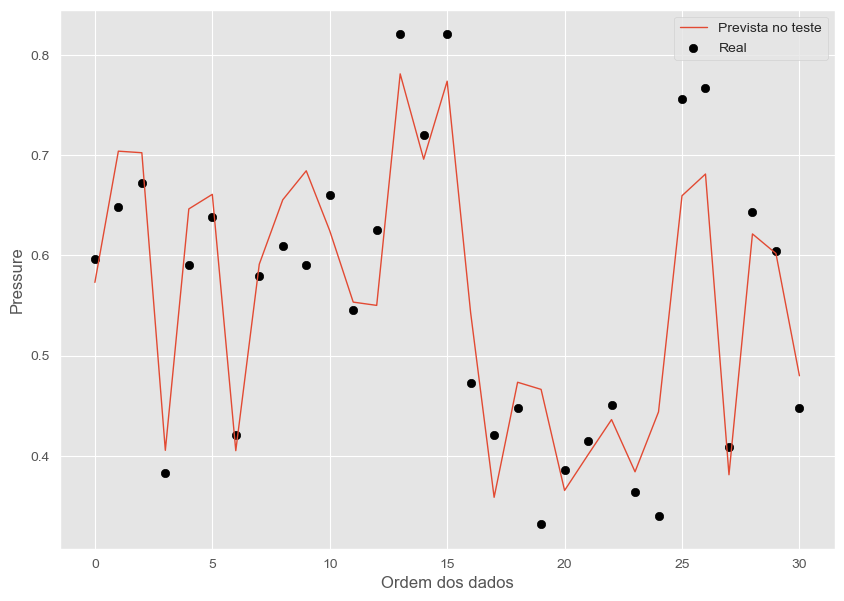

In [426]:
# avaliação conjunto de teste
n = 31
plt.style.use("ggplot")
f = plt.figure(figsize=(10,7))
plt.plot(range(n), y_hat_test, label="Prevista no teste", lw=1)
plt.scatter(range(n), y_test, color="black", label="Real")
plt.ylabel("Pressure")
plt.xlabel("Ordem dos dados")
plt.legend(loc="best")
f.savefig("rnn_demanda1.png")
plt.show()

Acima, a previsão é feita da forma tradicional, isto é, colocando a probabilidade de Dropout em 0%, usando assim toda a capacidade da rede. Esse é o padrão do Keras e precisaremos rescrevê-lo para implementar Monte-Carlo Dropout, no qual mantemos as probabilidades de Dropout de treino também durante as previsões. Abaixo, vamos definir uma função que retornará a última camada da rede, (as previsões) dada a camada de entrada (as variáveis). Além disso, vamos definir que está função será usada tal como durante o treinamento, passando K.learning_phase().
Abaixo realizamos 1000 forwad-passes pela rede neural e obtemos 1000 previsões para cada ponto.

In [427]:
import tensorflow as tf
import numpy as np
from keras import backend as K

T = 1000

tf.keras.backend.set_learning_phase(1)

predict_stochastic = K.function([model.layers[0].input], [model.layers[-1].output])

y_hat_mc = np.array([predict_stochastic([X_test]) for _ in range(T)])

y_hat_mc = y_hat_mc.reshape(-1, y_test.shape[0]).T

C:\Users\AdmPDI\Documents\anaconda\lib\site-packages\keras\backend.py:451: UserWarning: `tf.keras.backend.set_learning_phase` is deprecated and will be removed after 2020-10-11. To update it, simply pass a True/False value to the `training` argument of the `__call__` method of your layer or model.
  warnings.warn(


In [428]:
y_hat_mc.shape

(31, 1000)

In [429]:
# para cada amostra, foram calculados 1000 resultados com base no Dropout . Vamos ver o dataframe :

In [430]:
yhat=pd.DataFrame(y_hat_mc)

In [431]:
yhat

,0,1,2,3,4,5,6,7,8,9,...,990,991,992,993,994,995,996,997,998,999
0,0.603679,0.613607,0.598728,0.658845,0.602183,0.562357,0.619268,0.443432,0.585555,0.592115,...,0.570526,0.556102,0.621246,0.559235,0.621390,0.653623,0.594789,0.550574,0.599155,0.566135
1,0.590951,0.707310,0.691951,0.666458,0.584024,0.743169,0.733096,0.676964,0.674628,0.661476,...,0.678663,0.746556,0.670154,0.734268,0.562696,0.564739,0.672407,0.808070,0.637511,0.723832
2,0.714281,0.663468,0.679290,0.738396,0.738452,0.689949,0.669126,0.640658,0.744470,0.705910,...,0.638053,0.621863,0.705434,0.639871,0.703006,0.742114,0.700208,0.749661,0.685410,0.680798
3,0.392415,0.694941,0.341839,0.334330,0.411765,0.363027,0.440519,0.365569,0.416631,0.553963,...,0.628998,0.441547,0.371912,0.318116,0.427504,0.384496,0.338041,0.392511,0.404887,0.327588
4,0.606211,0.712805,0.581043,0.617612,0.622061,0.667772,0.653112,0.663801,0.677733,0.630495,...,0.569372,0.611093,0.672424,0.714356,0.635179,0.586563,0.665401,0.592167,0.588167,0.648435
5,0.588973,0.522410,0.622454,0.763462,0.695756,0.602633,0.599066,0.622931,0.731074,0.587412,...,0.547142,0.594876,0.573642,0.583441,0.751314,0.550088,0.669667,0.600305,0.632165,0.645216
6,0.444992,0.276673,0.363728,0.338155,0.445751,0.359397,0.342549,0.408788,0.360461,0.401496,...,0.471586,0.347003,0.387504,0.381186,0.572866,0.449002,0.342375,0.507631,0.352957,0.506307
7,0.591745,0.598029,0.555983,0.525622,0.583728,0.616303,0.591476,0.533210,0.608084,0.561033,...,0.629282,0.605894,0.686353,0.559486,0.604749,0.580312,0.589833,0.576429,0.602177,0.548436
8,0.606467,0.623562,0.591299,0.639551,0.601450,0.668393,0.678736,0.679593,0.587619,0.592868,...,0.649092,0.669831,0.498780,0.619643,0.641153,0.592228,0.589900,0.635956,0.589832,0.673422
9,0.627740,0.686934,0.652094,0.594143,0.676519,0.633507,0.676942,0.600810,0.659673,0.677103,...,0.671045,0.664846,0.720152,0.670090,0.624171,0.647349,0.687597,0.623933,0.666818,0.699664


In [432]:
#vamos calcular a média dos 1000 resultados para cada amostra de teste

In [433]:
yhat['mean']=yhat.apply(np.mean,axis=1)

In [434]:
yhat

,0,1,2,3,4,5,6,7,8,9,...,991,992,993,994,995,996,997,998,999,mean
0,0.603679,0.613607,0.598728,0.658845,0.602183,0.562357,0.619268,0.443432,0.585555,0.592115,...,0.556102,0.621246,0.559235,0.621390,0.653623,0.594789,0.550574,0.599155,0.566135,0.600587
1,0.590951,0.707310,0.691951,0.666458,0.584024,0.743169,0.733096,0.676964,0.674628,0.661476,...,0.746556,0.670154,0.734268,0.562696,0.564739,0.672407,0.808070,0.637511,0.723832,0.681157
2,0.714281,0.663468,0.679290,0.738396,0.738452,0.689949,0.669126,0.640658,0.744470,0.705910,...,0.621863,0.705434,0.639871,0.703006,0.742114,0.700208,0.749661,0.685410,0.680798,0.694555
3,0.392415,0.694941,0.341839,0.334330,0.411765,0.363027,0.440519,0.365569,0.416631,0.553963,...,0.441547,0.371912,0.318116,0.427504,0.384496,0.338041,0.392511,0.404887,0.327588,0.409113
4,0.606211,0.712805,0.581043,0.617612,0.622061,0.667772,0.653112,0.663801,0.677733,0.630495,...,0.611093,0.672424,0.714356,0.635179,0.586563,0.665401,0.592167,0.588167,0.648435,0.628143
5,0.588973,0.522410,0.622454,0.763462,0.695756,0.602633,0.599066,0.622931,0.731074,0.587412,...,0.594876,0.573642,0.583441,0.751314,0.550088,0.669667,0.600305,0.632165,0.645216,0.640229
6,0.444992,0.276673,0.363728,0.338155,0.445751,0.359397,0.342549,0.408788,0.360461,0.401496,...,0.347003,0.387504,0.381186,0.572866,0.449002,0.342375,0.507631,0.352957,0.506307,0.411736
7,0.591745,0.598029,0.555983,0.525622,0.583728,0.616303,0.591476,0.533210,0.608084,0.561033,...,0.605894,0.686353,0.559486,0.604749,0.580312,0.589833,0.576429,0.602177,0.548436,0.597554
8,0.606467,0.623562,0.591299,0.639551,0.601450,0.668393,0.678736,0.679593,0.587619,0.592868,...,0.669831,0.498780,0.619643,0.641153,0.592228,0.589900,0.635956,0.589832,0.673422,0.626700
9,0.627740,0.686934,0.652094,0.594143,0.676519,0.633507,0.676942,0.600810,0.659673,0.677103,...,0.664846,0.720152,0.670090,0.624171,0.647349,0.687597,0.623933,0.666818,0.699664,0.649426


In [435]:
#separamos novamente os 1000 resultados retitrando a coluna média 

In [436]:
yhatd=yhat.iloc[:,0:1000]

In [437]:
yhatd

,0,1,2,3,4,5,6,7,8,9,...,990,991,992,993,994,995,996,997,998,999
0,0.603679,0.613607,0.598728,0.658845,0.602183,0.562357,0.619268,0.443432,0.585555,0.592115,...,0.570526,0.556102,0.621246,0.559235,0.621390,0.653623,0.594789,0.550574,0.599155,0.566135
1,0.590951,0.707310,0.691951,0.666458,0.584024,0.743169,0.733096,0.676964,0.674628,0.661476,...,0.678663,0.746556,0.670154,0.734268,0.562696,0.564739,0.672407,0.808070,0.637511,0.723832
2,0.714281,0.663468,0.679290,0.738396,0.738452,0.689949,0.669126,0.640658,0.744470,0.705910,...,0.638053,0.621863,0.705434,0.639871,0.703006,0.742114,0.700208,0.749661,0.685410,0.680798
3,0.392415,0.694941,0.341839,0.334330,0.411765,0.363027,0.440519,0.365569,0.416631,0.553963,...,0.628998,0.441547,0.371912,0.318116,0.427504,0.384496,0.338041,0.392511,0.404887,0.327588
4,0.606211,0.712805,0.581043,0.617612,0.622061,0.667772,0.653112,0.663801,0.677733,0.630495,...,0.569372,0.611093,0.672424,0.714356,0.635179,0.586563,0.665401,0.592167,0.588167,0.648435
5,0.588973,0.522410,0.622454,0.763462,0.695756,0.602633,0.599066,0.622931,0.731074,0.587412,...,0.547142,0.594876,0.573642,0.583441,0.751314,0.550088,0.669667,0.600305,0.632165,0.645216
6,0.444992,0.276673,0.363728,0.338155,0.445751,0.359397,0.342549,0.408788,0.360461,0.401496,...,0.471586,0.347003,0.387504,0.381186,0.572866,0.449002,0.342375,0.507631,0.352957,0.506307
7,0.591745,0.598029,0.555983,0.525622,0.583728,0.616303,0.591476,0.533210,0.608084,0.561033,...,0.629282,0.605894,0.686353,0.559486,0.604749,0.580312,0.589833,0.576429,0.602177,0.548436
8,0.606467,0.623562,0.591299,0.639551,0.601450,0.668393,0.678736,0.679593,0.587619,0.592868,...,0.649092,0.669831,0.498780,0.619643,0.641153,0.592228,0.589900,0.635956,0.589832,0.673422
9,0.627740,0.686934,0.652094,0.594143,0.676519,0.633507,0.676942,0.600810,0.659673,0.677103,...,0.671045,0.664846,0.720152,0.670090,0.624171,0.647349,0.687597,0.623933,0.666818,0.699664


In [438]:
#vamos calcular o desvio padrão dos 1000 resultados dos dados de teste

In [439]:
yhatd['2*std']=yhatd.apply(np.std,axis=1)

In [440]:
yhatd

,0,1,2,3,4,5,6,7,8,9,...,991,992,993,994,995,996,997,998,999,2*std
0,0.603679,0.613607,0.598728,0.658845,0.602183,0.562357,0.619268,0.443432,0.585555,0.592115,...,0.556102,0.621246,0.559235,0.621390,0.653623,0.594789,0.550574,0.599155,0.566135,0.062411
1,0.590951,0.707310,0.691951,0.666458,0.584024,0.743169,0.733096,0.676964,0.674628,0.661476,...,0.746556,0.670154,0.734268,0.562696,0.564739,0.672407,0.808070,0.637511,0.723832,0.046440
2,0.714281,0.663468,0.679290,0.738396,0.738452,0.689949,0.669126,0.640658,0.744470,0.705910,...,0.621863,0.705434,0.639871,0.703006,0.742114,0.700208,0.749661,0.685410,0.680798,0.043127
3,0.392415,0.694941,0.341839,0.334330,0.411765,0.363027,0.440519,0.365569,0.416631,0.553963,...,0.441547,0.371912,0.318116,0.427504,0.384496,0.338041,0.392511,0.404887,0.327588,0.073077
4,0.606211,0.712805,0.581043,0.617612,0.622061,0.667772,0.653112,0.663801,0.677733,0.630495,...,0.611093,0.672424,0.714356,0.635179,0.586563,0.665401,0.592167,0.588167,0.648435,0.053035
5,0.588973,0.522410,0.622454,0.763462,0.695756,0.602633,0.599066,0.622931,0.731074,0.587412,...,0.594876,0.573642,0.583441,0.751314,0.550088,0.669667,0.600305,0.632165,0.645216,0.059284
6,0.444992,0.276673,0.363728,0.338155,0.445751,0.359397,0.342549,0.408788,0.360461,0.401496,...,0.347003,0.387504,0.381186,0.572866,0.449002,0.342375,0.507631,0.352957,0.506307,0.085710
7,0.591745,0.598029,0.555983,0.525622,0.583728,0.616303,0.591476,0.533210,0.608084,0.561033,...,0.605894,0.686353,0.559486,0.604749,0.580312,0.589833,0.576429,0.602177,0.548436,0.038889
8,0.606467,0.623562,0.591299,0.639551,0.601450,0.668393,0.678736,0.679593,0.587619,0.592868,...,0.669831,0.498780,0.619643,0.641153,0.592228,0.589900,0.635956,0.589832,0.673422,0.048687
9,0.627740,0.686934,0.652094,0.594143,0.676519,0.633507,0.676942,0.600810,0.659673,0.677103,...,0.664846,0.720152,0.670090,0.624171,0.647349,0.687597,0.623933,0.666818,0.699664,0.044998


In [441]:
#Abaixo os valores reais para y do conjunto de teste

In [442]:
y_test=pd.DataFrame(y_test)

In [443]:
y_test

,5
1154,0.596591
475,0.648363
458,0.671870
43,0.383147
533,0.590555
1366,0.638046
537,0.420906
273,0.579068
428,0.609434
381,0.590342


In [444]:
#resetando o índice 

In [445]:
y_test=y_test.reset_index(drop=True)

In [446]:
y_test

,5
0,0.596591
1,0.648363
2,0.671870
3,0.383147
4,0.590555
5,0.638046
6,0.420906
7,0.579068
8,0.609434
9,0.590342


In [447]:
#retirado a coluna 0

In [448]:
mean=yhat.iloc[:,1000]

In [449]:
mean=pd.DataFrame(mean)

In [450]:
mean

,mean
0,0.600587
1,0.681157
2,0.694555
3,0.409113
4,0.628143
5,0.640229
6,0.411736
7,0.597554
8,0.626700
9,0.649426


In [451]:
desvpad=yhatd.iloc[:,1000]

In [452]:
desvpad=2*pd.DataFrame(desvpad)

In [453]:
desvpad

,2*std
0,0.124822
1,0.092880
2,0.086253
3,0.146154
4,0.106069
5,0.118568
6,0.171419
7,0.077779
8,0.097374
9,0.089997


In [454]:
#colocar tudo em uma tabela

In [455]:
df.resume=pd.concat([y_test,mean,desvpad],axis=1)

C:\Users\AdmPDI\AppData\Local\Temp\ipykernel_22160\1750862409.py:1: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  df.resume=pd.concat([y_test,mean,desvpad],axis=1)


In [456]:
df.resume

,5,mean,2*std
0,0.596591,0.600587,0.124822
1,0.648363,0.681157,0.092880
2,0.671870,0.694555,0.086253
3,0.383147,0.409113,0.146154
4,0.590555,0.628143,0.106069
5,0.638046,0.640229,0.118568
6,0.420906,0.411736,0.171419
7,0.579068,0.597554,0.077779
8,0.609434,0.626700,0.097374
9,0.590342,0.649426,0.089997


In [457]:
df.resume['Ulow']=df.resume['mean']-df.resume['2*std']

In [458]:
df.resume['Uup']=df.resume['mean'] + df.resume['2*std']

In [459]:
df.resume

,5,mean,2*std,Ulow,Uup
0,0.596591,0.600587,0.124822,0.475765,0.725408
1,0.648363,0.681157,0.092880,0.588277,0.774037
2,0.671870,0.694555,0.086253,0.608302,0.780808
3,0.383147,0.409113,0.146154,0.262959,0.555268
4,0.590555,0.628143,0.106069,0.522074,0.734212
5,0.638046,0.640229,0.118568,0.521662,0.758797
6,0.420906,0.411736,0.171419,0.240316,0.583155
7,0.579068,0.597554,0.077779,0.519775,0.675332
8,0.609434,0.626700,0.097374,0.529326,0.724074
9,0.590342,0.649426,0.089997,0.559429,0.739422


In [460]:
    df.resume.rename(columns={'Pressure ':'y_real'},inplace=True)  

In [461]:
df.resume

,5,mean,2*std,Ulow,Uup
0,0.596591,0.600587,0.124822,0.475765,0.725408
1,0.648363,0.681157,0.092880,0.588277,0.774037
2,0.671870,0.694555,0.086253,0.608302,0.780808
3,0.383147,0.409113,0.146154,0.262959,0.555268
4,0.590555,0.628143,0.106069,0.522074,0.734212
5,0.638046,0.640229,0.118568,0.521662,0.758797
6,0.420906,0.411736,0.171419,0.240316,0.583155
7,0.579068,0.597554,0.077779,0.519775,0.675332
8,0.609434,0.626700,0.097374,0.529326,0.724074
9,0.590342,0.649426,0.089997,0.559429,0.739422


In [462]:
df.resume['erro']=abs(df.resume[5]-df.resume['mean'])

In [463]:
df.resume

,5,mean,2*std,Ulow,Uup,erro
0,0.596591,0.600587,0.124822,0.475765,0.725408,0.003996
1,0.648363,0.681157,0.092880,0.588277,0.774037,0.032793
2,0.671870,0.694555,0.086253,0.608302,0.780808,0.022686
3,0.383147,0.409113,0.146154,0.262959,0.555268,0.025967
4,0.590555,0.628143,0.106069,0.522074,0.734212,0.037588
5,0.638046,0.640229,0.118568,0.521662,0.758797,0.002183
6,0.420906,0.411736,0.171419,0.240316,0.583155,0.009170
7,0.579068,0.597554,0.077779,0.519775,0.675332,0.018486
8,0.609434,0.626700,0.097374,0.529326,0.724074,0.017265
9,0.590342,0.649426,0.089997,0.559429,0.739422,0.059084


In [464]:
df.resume.to_csv('df.resume.csv')

In [465]:
#verificar um valor predito : média e desvio padrão 

In [466]:
yt=np.array(y_test)

In [467]:
yt[0]

array([0.59659106])

In [468]:
np.mean(y_hat_mc[0])

0.6005863

In [469]:
np.sqrt(np.var(y_hat_mc[0]))

0.062410746

In [470]:
#Computamos média e variância para cada ponto no set de teste.

In [471]:
l = 10
y_hat_test_mean = np.mean(y_hat_mc, axis=1) # média das 1000 previsões para cada ponto 
y_hat_test_variance = np.var(y_hat_mc, axis=1) 
tau = l**2 * (1 - p_dropout) / (2 * X_train.shape[0] * lbd)
y_hat_test_variance += tau**-1  # variância das 1000 previsões para cada ponto 

In [472]:
metrics.mean_absolute_error(y_test, y_hat_test_mean)

0.044297432805033385

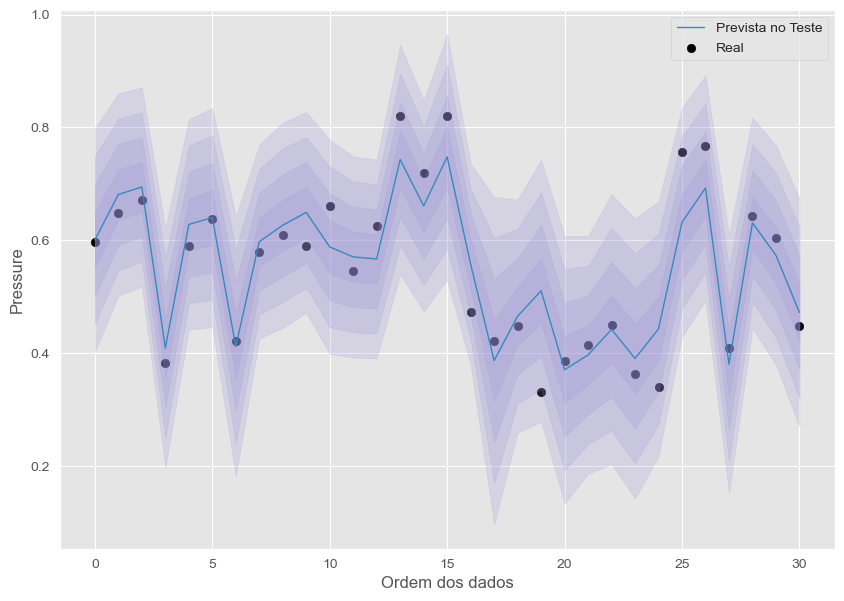

In [473]:
n = 31
t = range(n) 
mu = y_hat_test_mean
sigma = np.sqrt(y_hat_test_variance)

plt.style.use("ggplot")
f = plt.figure(figsize=(10,7))
plt.plot(t, mu, label="Prevista no Teste", color="C1", lw=1)
plt.scatter(t, y_test, color="black", label="Real")

for shade in range(1, 5):
    plt.fill_between(t, mu+sigma* (.5*shade), mu-sigma * (.5*shade), alpha=0.2, color="C2")

plt.ylabel("Pressure")
plt.xlabel("Ordem dos dados")
plt.legend(loc="best")
f.savefig("rnn_demanda_test.png")
plt.show()

In [474]:
T = 1000

tf.keras.backend.set_learning_phase(1)

predict_stochastic = K.function([model.layers[0].input], [model.layers[-1].output])

y_hat_mc = np.array([predict_stochastic([X_train]) for _ in range(T)])

y_hat_mc = y_hat_mc.reshape(-1, y_train.shape[0]).T

C:\Users\AdmPDI\Documents\anaconda\lib\site-packages\keras\backend.py:451: UserWarning: `tf.keras.backend.set_learning_phase` is deprecated and will be removed after 2020-10-11. To update it, simply pass a True/False value to the `training` argument of the `__call__` method of your layer or model.
  warnings.warn(


In [475]:
l = 10
y_hat_train_mean = np.mean(y_hat_mc, axis=1)
y_hat_train_variance = np.var(y_hat_mc, axis=1)
tau = l**2 * (1 - p_dropout) / (2 * X_train.shape[0] * lbd)
y_hat_train_variance += tau**-1

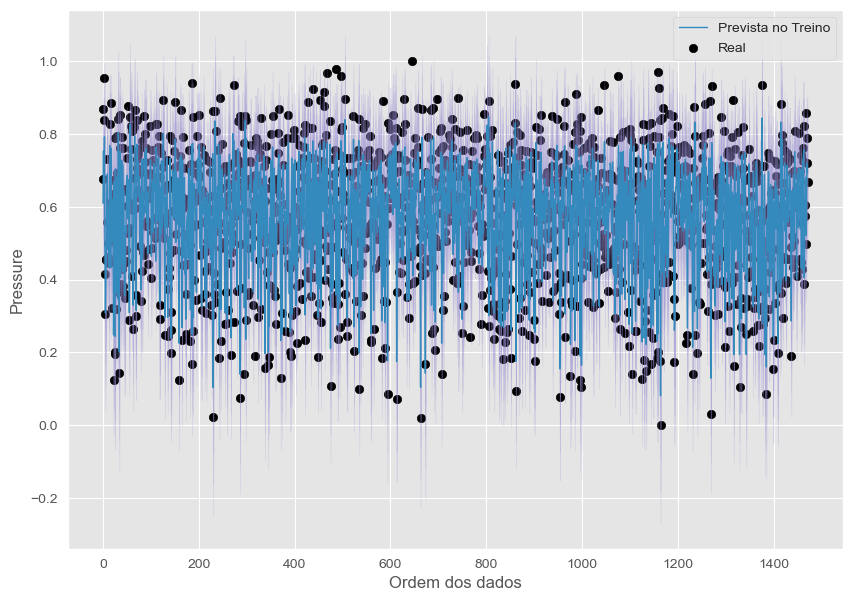

In [476]:
n = 1472
t = range(n) 
mu = y_hat_train_mean
sigma = np.sqrt(y_hat_train_variance)

plt.style.use("ggplot")
f = plt.figure(figsize=(10,7))
plt.plot(t, mu, label="Prevista no Treino", color="C1", lw=1)
plt.scatter(t, y_train, color="black", label="Real")

for shade in range(1, 5):
    plt.fill_between(t, mu+sigma* (.5*shade), mu-sigma * (.5*shade), alpha=0.2, color="C2") # 90% IC

plt.ylabel("Pressure")
plt.xlabel("Ordem dos dados")
plt.legend(loc="best")
f.savefig("rnn_demanda_train.png")
plt.show()

Determinação do erro sistemático e aleatório sobre todos os valores do DataFrame

In [477]:
X_test=X_test.reset_index(drop=True)

In [478]:
X_test

,0,1,2,3,4
0,0.040404,0.783784,0.000000,1.000000,0.270697
1,0.116162,0.000000,0.454545,0.601010,0.022858
2,0.090909,0.000000,0.454545,1.000000,0.020653
3,0.242424,0.000000,1.000000,0.199495,0.046555
4,0.116162,0.121622,0.454545,0.199495,0.043912
5,0.070707,0.301802,0.272727,0.199495,0.092743
6,0.308081,0.121622,0.454545,0.199495,0.043912
7,0.015152,0.090090,0.727273,0.199495,0.052836
8,0.030303,0.328829,0.727273,0.199495,0.205952
9,0.040404,0.238739,0.727273,0.199495,0.098992


In [479]:

 previsão=model.predict(X_test[:31])


1/1 [==============================] - 0s 15ms/step


In [480]:
colnames=["Predict"]

In [481]:
previsão1=pd.DataFrame(previsão, columns=colnames)

In [482]:
previsão1

,Predict
0,0.572977
1,0.703849
2,0.702290
3,0.405478
4,0.646232
5,0.660783
6,0.405129
7,0.591111
8,0.655338
9,0.684278


In [483]:
df.resume3=pd.concat([X_test,y_test,previsão1],axis=1)

C:\Users\AdmPDI\AppData\Local\Temp\ipykernel_22160\3988421289.py:1: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  df.resume3=pd.concat([X_test,y_test,previsão1],axis=1)


In [484]:
df.resume3

,0,1,2,3,4,5,Predict
0,0.040404,0.783784,0.000000,1.000000,0.270697,0.596591,0.572977
1,0.116162,0.000000,0.454545,0.601010,0.022858,0.648363,0.703849
2,0.090909,0.000000,0.454545,1.000000,0.020653,0.671870,0.702290
3,0.242424,0.000000,1.000000,0.199495,0.046555,0.383147,0.405478
4,0.116162,0.121622,0.454545,0.199495,0.043912,0.590555,0.646232
5,0.070707,0.301802,0.272727,0.199495,0.092743,0.638046,0.660783
6,0.308081,0.121622,0.454545,0.199495,0.043912,0.420906,0.405129
7,0.015152,0.090090,0.727273,0.199495,0.052836,0.579068,0.591111
8,0.030303,0.328829,0.727273,0.199495,0.205952,0.609434,0.655338
9,0.040404,0.238739,0.727273,0.199495,0.098992,0.590342,0.684278


In [485]:
#criar a coluna de predict delta x1 

In [486]:
#incerteza de x1 (medidor de frequência)

In [487]:
ux1=0.000001
ux2=0.000001
ux3=0.000001
ux4=0.000001
ux5=0.000001

In [488]:
deltax1=X_test[:31]+np.array([ux1,0,0,0,0])

In [489]:
deltax1

,0,1,2,3,4
0,0.040405,0.783784,0.000000,1.000000,0.270697
1,0.116163,0.000000,0.454545,0.601010,0.022858
2,0.090910,0.000000,0.454545,1.000000,0.020653
3,0.242425,0.000000,1.000000,0.199495,0.046555
4,0.116163,0.121622,0.454545,0.199495,0.043912
5,0.070708,0.301802,0.272727,0.199495,0.092743
6,0.308082,0.121622,0.454545,0.199495,0.043912
7,0.015153,0.090090,0.727273,0.199495,0.052836
8,0.030304,0.328829,0.727273,0.199495,0.205952
9,0.040405,0.238739,0.727273,0.199495,0.098992


In [490]:
previsãodeltax1=model.predict(deltax1[:31])


1/1 [==============================] - 0s 19ms/step


In [491]:
colnames=["Predict Deltax1"]
previsãodeltax1=pd.DataFrame(previsãodeltax1, columns=colnames)

In [492]:
#criar a coluna de predict delta x2

In [493]:
#incerteza de x2 (medidor de ângulo)

In [494]:
deltax2=X_test[:31]+np.array([0,ux2,0,0,0])

In [495]:
deltax2

,0,1,2,3,4
0,0.040404,0.783785,0.000000,1.000000,0.270697
1,0.116162,0.000001,0.454545,0.601010,0.022858
2,0.090909,0.000001,0.454545,1.000000,0.020653
3,0.242424,0.000001,1.000000,0.199495,0.046555
4,0.116162,0.121623,0.454545,0.199495,0.043912
5,0.070707,0.301803,0.272727,0.199495,0.092743
6,0.308081,0.121623,0.454545,0.199495,0.043912
7,0.015152,0.090091,0.727273,0.199495,0.052836
8,0.030303,0.328830,0.727273,0.199495,0.205952
9,0.040404,0.238740,0.727273,0.199495,0.098992


In [496]:
previsãodeltax2=model.predict(deltax2[:31])

1/1 [==============================] - 0s 16ms/step


In [497]:
colnames=["Predict Deltax2"]
previsãodeltax2=pd.DataFrame(previsãodeltax2, columns=colnames)

In [498]:
#criar a coluna de predict delta x3

In [499]:
#incerteza de x3 (medidor de comprimento)

In [500]:
deltax3=X_test[:31]+np.array([0,0,ux3,0,0])

In [501]:
deltax3

,0,1,2,3,4
0,0.040404,0.783784,0.000001,1.000000,0.270697
1,0.116162,0.000000,0.454546,0.601010,0.022858
2,0.090909,0.000000,0.454546,1.000000,0.020653
3,0.242424,0.000000,1.000001,0.199495,0.046555
4,0.116162,0.121622,0.454546,0.199495,0.043912
5,0.070707,0.301802,0.272728,0.199495,0.092743
6,0.308081,0.121622,0.454546,0.199495,0.043912
7,0.015152,0.090090,0.727274,0.199495,0.052836
8,0.030303,0.328829,0.727274,0.199495,0.205952
9,0.040404,0.238739,0.727274,0.199495,0.098992


In [502]:
previsãodeltax3=model.predict(deltax3[:31])

1/1 [==============================] - 0s 15ms/step


In [503]:
colnames=["Predict Deltax3"]
previsãodeltax3=pd.DataFrame(previsãodeltax3, columns=colnames)

In [504]:
#criar a coluna de predict delta x4

In [505]:
#incerteza de x4 (medidor de velocidade).

In [506]:
deltax4=X_test[:31]+np.array([0,0,0,ux4,0])

In [507]:
deltax4

,0,1,2,3,4
0,0.040404,0.783784,0.000000,1.000001,0.270697
1,0.116162,0.000000,0.454545,0.601011,0.022858
2,0.090909,0.000000,0.454545,1.000001,0.020653
3,0.242424,0.000000,1.000000,0.199496,0.046555
4,0.116162,0.121622,0.454545,0.199496,0.043912
5,0.070707,0.301802,0.272727,0.199496,0.092743
6,0.308081,0.121622,0.454545,0.199496,0.043912
7,0.015152,0.090090,0.727273,0.199496,0.052836
8,0.030303,0.328829,0.727273,0.199496,0.205952
9,0.040404,0.238739,0.727273,0.199496,0.098992


In [508]:
previsãodeltax4=model.predict(deltax4[:31])

1/1 [==============================] - 0s 16ms/step


In [509]:
colnames=["Predict Deltax4"]
previsãodeltax4=pd.DataFrame(previsãodeltax4, columns=colnames)

In [510]:
#criar a coluna de predict delta x5

In [511]:
#incerteza de x5 (medidor de sucção)

In [512]:
deltax5=X_test[:31]+np.array([0,0,0,0,ux5])

In [513]:
deltax5

,0,1,2,3,4
0,0.040404,0.783784,0.000000,1.000000,0.270698
1,0.116162,0.000000,0.454545,0.601010,0.022859
2,0.090909,0.000000,0.454545,1.000000,0.020654
3,0.242424,0.000000,1.000000,0.199495,0.046556
4,0.116162,0.121622,0.454545,0.199495,0.043913
5,0.070707,0.301802,0.272727,0.199495,0.092744
6,0.308081,0.121622,0.454545,0.199495,0.043913
7,0.015152,0.090090,0.727273,0.199495,0.052837
8,0.030303,0.328829,0.727273,0.199495,0.205953
9,0.040404,0.238739,0.727273,0.199495,0.098993


In [514]:
previsãodeltax5=model.predict(deltax5[:31])

1/1 [==============================] - 0s 16ms/step


In [515]:
colnames=["Predict Deltax5"]
previsãodeltax5=pd.DataFrame(previsãodeltax5, columns=colnames)

In [516]:
df.total=pd.concat([y_test,previsão1,previsãodeltax1,previsãodeltax2,previsãodeltax3,previsãodeltax4,previsãodeltax5],axis=1)

C:\Users\AdmPDI\AppData\Local\Temp\ipykernel_22160\2651709830.py:1: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  df.total=pd.concat([y_test,previsão1,previsãodeltax1,previsãodeltax2,previsãodeltax3,previsãodeltax4,previsãodeltax5],axis=1)


In [517]:
df.total['c1']=(df.total['Predict Deltax1']-df.total['Predict'])/ux1


In [518]:
df.total['c2']=(df.total['Predict Deltax2']-df.total['Predict'])/ux2


In [519]:
df.total['c3']=(df.total['Predict Deltax3']-df.total['Predict'])/ux3

In [520]:
df.total['c4']=(df.total['Predict Deltax4']-df.total['Predict'])/ux4

In [521]:
df.total['c5']=(df.total['Predict Deltax5']-df.total['Predict'])/ux5

In [522]:
#cálculo da incerteza combinada : incerteza expandida de x1 a x5  desvio padrão do erro sistemático
#x1: medidor de frequencia sonora.5% do valor médio da escala
#x2: medidor de angulo :5% do valor médio da escala
#x3: medidor de comprimento 5% do valor médio da escala
#x4: medidor de velocidade do vento Pesquisando a incerteza em tuneis de vento chega a 15% do resultado . Como a velocidade média é em torno de 40 m/s estimou-se em +-6m/s²
#x5: medidor de sucção 5% do valor médio da escala
#y: pressão somora: 5% do valor médio da escala
 

In [523]:
upx1=0.0003468*0.5/2
upx2=0.00488*0.5/2
upx3=0.001470*0.5/2
upx4=0.01966*0.5/2
upx5=0.1*0.5/2
upy=0.008*0.5/2

In [524]:
df.total['uc']=2*((df.total['c1']*upx1)**2+(df.total['c2']*upx2)**2+(df.total['c3']*upx3)**2+(df.total['c4']*upx4)**2
                +(df.total['c5']*upx5)**2+(upy)**2)**0.5

In [525]:
df.total

,5,Predict,Predict Deltax1,Predict Deltax2,Predict Deltax3,Predict Deltax4,Predict Deltax5,c1,c2,c3,c4,c5,uc
0,0.596591,0.572977,0.572983,0.572977,0.572979,0.572977,0.572977,5.483627,-0.119209,1.549721,0.000000,0.000000,0.004276
1,0.648363,0.703849,0.703849,0.703850,0.703849,0.703850,0.703849,-0.298023,0.298023,-0.298023,0.059605,-0.536442,0.027136
2,0.671870,0.702290,0.702290,0.702290,0.702290,0.702290,0.702290,0.238419,0.417233,-0.238419,0.000000,0.178814,0.009849
3,0.383147,0.405478,0.405477,0.405478,0.405478,0.405478,0.405477,-0.685453,-0.208616,-0.089407,0.119209,-0.745058,0.037489
4,0.590555,0.646232,0.646231,0.646232,0.646232,0.646232,0.646231,-1.013279,-0.298023,-0.238419,0.178814,-1.251698,0.062742
5,0.638046,0.660783,0.660779,0.660783,0.660783,0.660783,0.660781,-4.112720,0.000000,-0.238419,0.178814,-1.430511,0.071663
6,0.420906,0.405129,0.405129,0.405129,0.405129,0.405130,0.405128,-0.834465,-0.417233,-0.178814,0.059605,-1.609325,0.080574
7,0.579068,0.591111,0.591114,0.591111,0.591111,0.591111,0.591112,3.635883,0.178814,-0.059605,0.000000,0.894070,0.044889
8,0.609434,0.655338,0.655335,0.655338,0.655338,0.655338,0.655338,-3.635883,-0.119209,-0.119209,0.119209,-0.298023,0.015489
9,0.590342,0.684278,0.684275,0.684278,0.684278,0.684278,0.684277,-2.503395,-0.119209,-0.238419,0.119209,-0.476837,0.024210


In [526]:
df.total['prediction error']=(df.total['Predict']-df.total[5])

In [527]:
df.total


,5,Predict,Predict Deltax1,Predict Deltax2,Predict Deltax3,Predict Deltax4,Predict Deltax5,c1,c2,c3,c4,c5,uc,prediction error
0,0.596591,0.572977,0.572983,0.572977,0.572979,0.572977,0.572977,5.483627,-0.119209,1.549721,0.000000,0.000000,0.004276,-0.023614
1,0.648363,0.703849,0.703849,0.703850,0.703849,0.703850,0.703849,-0.298023,0.298023,-0.298023,0.059605,-0.536442,0.027136,0.055486
2,0.671870,0.702290,0.702290,0.702290,0.702290,0.702290,0.702290,0.238419,0.417233,-0.238419,0.000000,0.178814,0.009849,0.030420
3,0.383147,0.405478,0.405477,0.405478,0.405478,0.405478,0.405477,-0.685453,-0.208616,-0.089407,0.119209,-0.745058,0.037489,0.022331
4,0.590555,0.646232,0.646231,0.646232,0.646232,0.646232,0.646231,-1.013279,-0.298023,-0.238419,0.178814,-1.251698,0.062742,0.055677
5,0.638046,0.660783,0.660779,0.660783,0.660783,0.660783,0.660781,-4.112720,0.000000,-0.238419,0.178814,-1.430511,0.071663,0.022737
6,0.420906,0.405129,0.405129,0.405129,0.405129,0.405130,0.405128,-0.834465,-0.417233,-0.178814,0.059605,-1.609325,0.080574,-0.015776
7,0.579068,0.591111,0.591114,0.591111,0.591111,0.591111,0.591112,3.635883,0.178814,-0.059605,0.000000,0.894070,0.044889,0.012043
8,0.609434,0.655338,0.655335,0.655338,0.655338,0.655338,0.655338,-3.635883,-0.119209,-0.119209,0.119209,-0.298023,0.015489,0.045904
9,0.590342,0.684278,0.684275,0.684278,0.684278,0.684278,0.684277,-2.503395,-0.119209,-0.238419,0.119209,-0.476837,0.024210,0.093936


In [528]:
df.total['prediction error'].describe()

count    31.000000
mean      0.004165
std       0.054537
min      -0.096530
25%      -0.026133
50%      -0.002257
75%       0.031390
max       0.134479
Name: prediction error, dtype: float64

In [529]:
es=df.total.loc[:,'prediction error'].mean()

In [530]:
es

0.004164508953793826

In [531]:
ea=df.total.loc[:,'prediction error'].std()

In [532]:
ea

0.05453739793058235

In [533]:
df.total['ucc']=2*((df.total['c1']*upx1)**2+(df.total['c2']*upx2)**2+(df.total['c3']*upx3)**2+(df.total['c4']*upx4)**2
                +(df.total['c5']*upx5)**2+(ea)**2)**0.5+abs(es)

In [534]:
df.total

,5,Predict,Predict Deltax1,Predict Deltax2,Predict Deltax3,Predict Deltax4,Predict Deltax5,c1,c2,c3,c4,c5,uc,prediction error,ucc
0,0.596591,0.572977,0.572983,0.572977,0.572979,0.572977,0.572977,5.483627,-0.119209,1.549721,0.000000,0.000000,0.004276,-0.023614,0.113250
1,0.648363,0.703849,0.703849,0.703850,0.703849,0.703850,0.703849,-0.298023,0.298023,-0.298023,0.059605,-0.536442,0.027136,0.055486,0.116493
2,0.671870,0.702290,0.702290,0.702290,0.702290,0.702290,0.702290,0.238419,0.417233,-0.238419,0.000000,0.178814,0.009849,0.030420,0.113610
3,0.383147,0.405478,0.405477,0.405478,0.405478,0.405478,0.405477,-0.685453,-0.208616,-0.089407,0.119209,-0.745058,0.037489,0.022331,0.119433
4,0.590555,0.646232,0.646231,0.646232,0.646232,0.646232,0.646231,-1.013279,-0.298023,-0.238419,0.178814,-1.251698,0.062742,0.055677,0.129934
5,0.638046,0.660783,0.660779,0.660783,0.660783,0.660783,0.660781,-4.112720,0.000000,-0.238419,0.178814,-1.430511,0.071663,0.022737,0.134613
6,0.420906,0.405129,0.405129,0.405129,0.405129,0.405130,0.405128,-0.834465,-0.417233,-0.178814,0.059605,-1.609325,0.080574,-0.015776,0.139714
7,0.579068,0.591111,0.591114,0.591111,0.591111,0.591111,0.591112,3.635883,0.178814,-0.059605,0.000000,0.894070,0.044889,0.012043,0.122047
8,0.609434,0.655338,0.655335,0.655338,0.655338,0.655338,0.655338,-3.635883,-0.119209,-0.119209,0.119209,-0.298023,0.015489,0.045904,0.114261
9,0.590342,0.684278,0.684275,0.684278,0.684278,0.684278,0.684277,-2.503395,-0.119209,-0.238419,0.119209,-0.476837,0.024210,0.093936,0.115822


In [535]:
dfb=df.total.drop(['Predict Deltax1','Predict Deltax2','Predict Deltax3','Predict Deltax4','Predict Deltax5','uc'],axis=1)

In [536]:
dfb

,5,Predict,c1,c2,c3,c4,c5,prediction error,ucc
0,0.596591,0.572977,5.483627,-0.119209,1.549721,0.000000,0.000000,-0.023614,0.113250
1,0.648363,0.703849,-0.298023,0.298023,-0.298023,0.059605,-0.536442,0.055486,0.116493
2,0.671870,0.702290,0.238419,0.417233,-0.238419,0.000000,0.178814,0.030420,0.113610
3,0.383147,0.405478,-0.685453,-0.208616,-0.089407,0.119209,-0.745058,0.022331,0.119433
4,0.590555,0.646232,-1.013279,-0.298023,-0.238419,0.178814,-1.251698,0.055677,0.129934
5,0.638046,0.660783,-4.112720,0.000000,-0.238419,0.178814,-1.430511,0.022737,0.134613
6,0.420906,0.405129,-0.834465,-0.417233,-0.178814,0.059605,-1.609325,-0.015776,0.139714
7,0.579068,0.591111,3.635883,0.178814,-0.059605,0.000000,0.894070,0.012043,0.122047
8,0.609434,0.655338,-3.635883,-0.119209,-0.119209,0.119209,-0.298023,0.045904,0.114261
9,0.590342,0.684278,-2.503395,-0.119209,-0.238419,0.119209,-0.476837,0.093936,0.115822


In [537]:
df.total['uccpercent']=(df.total['ucc']*100)/(df.total['Predict'])   

In [538]:
df.total

,5,Predict,Predict Deltax1,Predict Deltax2,Predict Deltax3,Predict Deltax4,Predict Deltax5,c1,c2,c3,c4,c5,uc,prediction error,ucc,uccpercent
0,0.596591,0.572977,0.572983,0.572977,0.572979,0.572977,0.572977,5.483627,-0.119209,1.549721,0.000000,0.000000,0.004276,-0.023614,0.113250,19.765144
1,0.648363,0.703849,0.703849,0.703850,0.703849,0.703850,0.703849,-0.298023,0.298023,-0.298023,0.059605,-0.536442,0.027136,0.055486,0.116493,16.550819
2,0.671870,0.702290,0.702290,0.702290,0.702290,0.702290,0.702290,0.238419,0.417233,-0.238419,0.000000,0.178814,0.009849,0.030420,0.113610,16.177078
3,0.383147,0.405478,0.405477,0.405478,0.405478,0.405478,0.405477,-0.685453,-0.208616,-0.089407,0.119209,-0.745058,0.037489,0.022331,0.119433,29.454779
4,0.590555,0.646232,0.646231,0.646232,0.646232,0.646232,0.646231,-1.013279,-0.298023,-0.238419,0.178814,-1.251698,0.062742,0.055677,0.129934,20.106337
5,0.638046,0.660783,0.660779,0.660783,0.660783,0.660783,0.660781,-4.112720,0.000000,-0.238419,0.178814,-1.430511,0.071663,0.022737,0.134613,20.371769
6,0.420906,0.405129,0.405129,0.405129,0.405129,0.405130,0.405128,-0.834465,-0.417233,-0.178814,0.059605,-1.609325,0.080574,-0.015776,0.139714,34.486153
7,0.579068,0.591111,0.591114,0.591111,0.591111,0.591111,0.591112,3.635883,0.178814,-0.059605,0.000000,0.894070,0.044889,0.012043,0.122047,20.647076
8,0.609434,0.655338,0.655335,0.655338,0.655338,0.655338,0.655338,-3.635883,-0.119209,-0.119209,0.119209,-0.298023,0.015489,0.045904,0.114261,17.435411
9,0.590342,0.684278,0.684275,0.684278,0.684278,0.684278,0.684277,-2.503395,-0.119209,-0.238419,0.119209,-0.476837,0.024210,0.093936,0.115822,16.926182


In [539]:
dfb['contribuição x1']=df.total['c1']*upx1

In [540]:
dfb

,5,Predict,c1,c2,c3,c4,c5,prediction error,ucc,contribuição x1
0,0.596591,0.572977,5.483627,-0.119209,1.549721,0.000000,0.000000,-0.023614,0.113250,0.000475
1,0.648363,0.703849,-0.298023,0.298023,-0.298023,0.059605,-0.536442,0.055486,0.116493,-0.000026
2,0.671870,0.702290,0.238419,0.417233,-0.238419,0.000000,0.178814,0.030420,0.113610,0.000021
3,0.383147,0.405478,-0.685453,-0.208616,-0.089407,0.119209,-0.745058,0.022331,0.119433,-0.000059
4,0.590555,0.646232,-1.013279,-0.298023,-0.238419,0.178814,-1.251698,0.055677,0.129934,-0.000088
5,0.638046,0.660783,-4.112720,0.000000,-0.238419,0.178814,-1.430511,0.022737,0.134613,-0.000357
6,0.420906,0.405129,-0.834465,-0.417233,-0.178814,0.059605,-1.609325,-0.015776,0.139714,-0.000072
7,0.579068,0.591111,3.635883,0.178814,-0.059605,0.000000,0.894070,0.012043,0.122047,0.000315
8,0.609434,0.655338,-3.635883,-0.119209,-0.119209,0.119209,-0.298023,0.045904,0.114261,-0.000315
9,0.590342,0.684278,-2.503395,-0.119209,-0.238419,0.119209,-0.476837,0.093936,0.115822,-0.000217


In [541]:
dfb['contribuição x2']=df.total['c2']*upx2

In [542]:
dfb['contribuição x3']=df.total['c3']*upx3

In [543]:
dfb['contribuição x4']=df.total['c4']*upx4

In [544]:
dfb['contribuição x5']=df.total['c5']*upx5

In [545]:
dfb

,5,Predict,c1,c2,c3,c4,c5,prediction error,ucc,contribuição x1,contribuição x2,contribuição x3,contribuição x4,contribuição x5
0,0.596591,0.572977,5.483627,-0.119209,1.549721,0.000000,0.000000,-0.023614,0.113250,0.000475,-0.000145,0.000570,0.000000,0.000000
1,0.648363,0.703849,-0.298023,0.298023,-0.298023,0.059605,-0.536442,0.055486,0.116493,-0.000026,0.000364,-0.000110,0.000293,-0.013411
2,0.671870,0.702290,0.238419,0.417233,-0.238419,0.000000,0.178814,0.030420,0.113610,0.000021,0.000509,-0.000088,0.000000,0.004470
3,0.383147,0.405478,-0.685453,-0.208616,-0.089407,0.119209,-0.745058,0.022331,0.119433,-0.000059,-0.000255,-0.000033,0.000586,-0.018626
4,0.590555,0.646232,-1.013279,-0.298023,-0.238419,0.178814,-1.251698,0.055677,0.129934,-0.000088,-0.000364,-0.000088,0.000879,-0.031292
5,0.638046,0.660783,-4.112720,0.000000,-0.238419,0.178814,-1.430511,0.022737,0.134613,-0.000357,0.000000,-0.000088,0.000879,-0.035763
6,0.420906,0.405129,-0.834465,-0.417233,-0.178814,0.059605,-1.609325,-0.015776,0.139714,-0.000072,-0.000509,-0.000066,0.000293,-0.040233
7,0.579068,0.591111,3.635883,0.178814,-0.059605,0.000000,0.894070,0.012043,0.122047,0.000315,0.000218,-0.000022,0.000000,0.022352
8,0.609434,0.655338,-3.635883,-0.119209,-0.119209,0.119209,-0.298023,0.045904,0.114261,-0.000315,-0.000145,-0.000044,0.000586,-0.007451
9,0.590342,0.684278,-2.503395,-0.119209,-0.238419,0.119209,-0.476837,0.093936,0.115822,-0.000217,-0.000145,-0.000088,0.000586,-0.011921


In [546]:
dfb=dfb[[5,'Predict','c1','c2','c3','c4','c5','contribuição x1','contribuição x2','contribuição x3','contribuição x4',
        'contribuição x5','prediction error','ucc']]

In [547]:
dfb

,5,Predict,c1,c2,c3,c4,c5,contribuição x1,contribuição x2,contribuição x3,contribuição x4,contribuição x5,prediction error,ucc
0,0.596591,0.572977,5.483627,-0.119209,1.549721,0.000000,0.000000,0.000475,-0.000145,0.000570,0.000000,0.000000,-0.023614,0.113250
1,0.648363,0.703849,-0.298023,0.298023,-0.298023,0.059605,-0.536442,-0.000026,0.000364,-0.000110,0.000293,-0.013411,0.055486,0.116493
2,0.671870,0.702290,0.238419,0.417233,-0.238419,0.000000,0.178814,0.000021,0.000509,-0.000088,0.000000,0.004470,0.030420,0.113610
3,0.383147,0.405478,-0.685453,-0.208616,-0.089407,0.119209,-0.745058,-0.000059,-0.000255,-0.000033,0.000586,-0.018626,0.022331,0.119433
4,0.590555,0.646232,-1.013279,-0.298023,-0.238419,0.178814,-1.251698,-0.000088,-0.000364,-0.000088,0.000879,-0.031292,0.055677,0.129934
5,0.638046,0.660783,-4.112720,0.000000,-0.238419,0.178814,-1.430511,-0.000357,0.000000,-0.000088,0.000879,-0.035763,0.022737,0.134613
6,0.420906,0.405129,-0.834465,-0.417233,-0.178814,0.059605,-1.609325,-0.000072,-0.000509,-0.000066,0.000293,-0.040233,-0.015776,0.139714
7,0.579068,0.591111,3.635883,0.178814,-0.059605,0.000000,0.894070,0.000315,0.000218,-0.000022,0.000000,0.022352,0.012043,0.122047
8,0.609434,0.655338,-3.635883,-0.119209,-0.119209,0.119209,-0.298023,-0.000315,-0.000145,-0.000044,0.000586,-0.007451,0.045904,0.114261
9,0.590342,0.684278,-2.503395,-0.119209,-0.238419,0.119209,-0.476837,-0.000217,-0.000145,-0.000088,0.000586,-0.011921,0.093936,0.115822


C:\Users\AdmPDI\Documents\anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\AdmPDI\Documents\anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


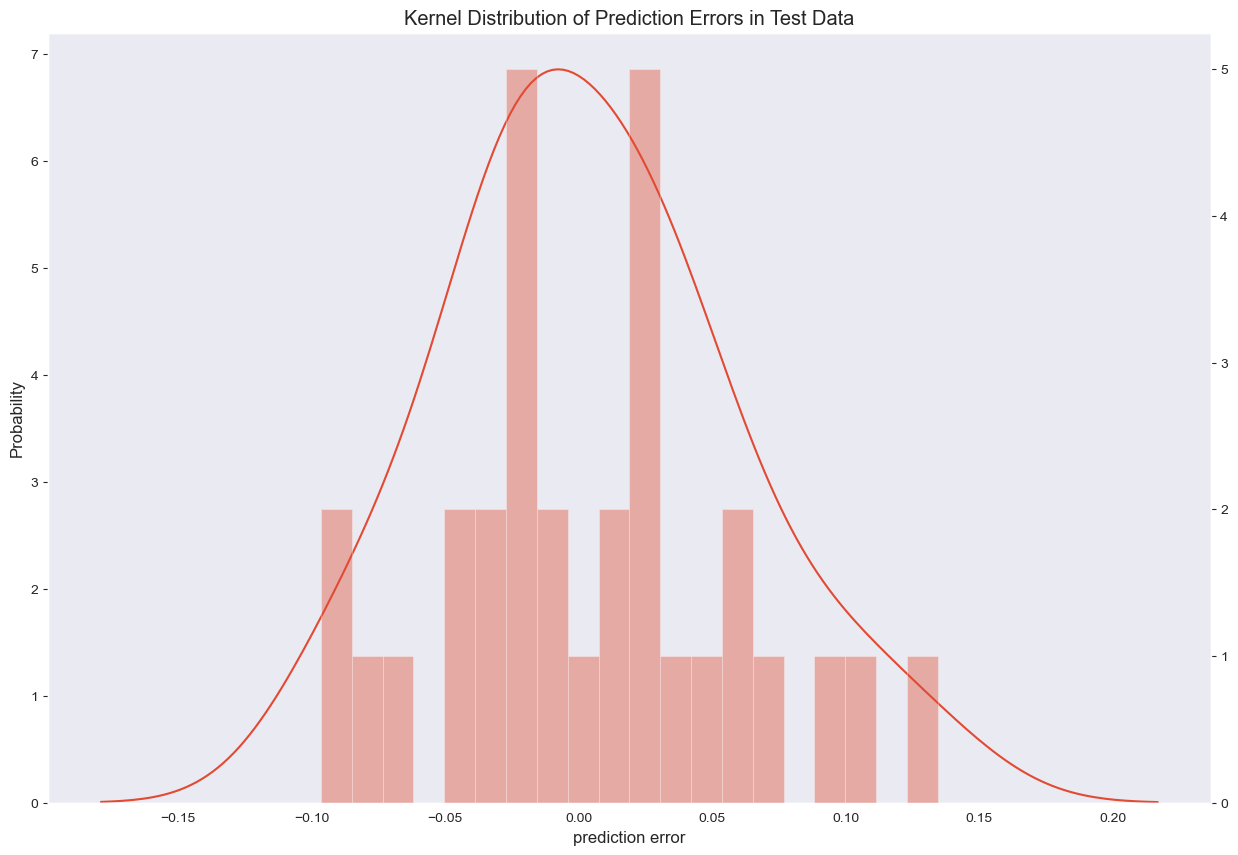

In [560]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime

bins = 20

# Criando o ambiente do gráfico 
sns.set_style("dark")
fig, ax = plt.subplots(1, 1, figsize=(15, 10))

# Insere curva KDE (Kernel Density Estimation)
g1 = sns.distplot(dfb["prediction error"], ax=ax, 
                  kde=True, hist=False) 

# Insere histograma
ax_copy = ax.twinx()
g2 = sns.distplot(dfb["prediction error"], ax=ax_copy, kde=False, hist=True, 
             bins=bins, norm_hist=False)

# Ajusta rótulos
g1.set_ylabel("Probability")
g2.set_title("Kernel Distribution of Prediction Errors in Test Data")

plt.show()


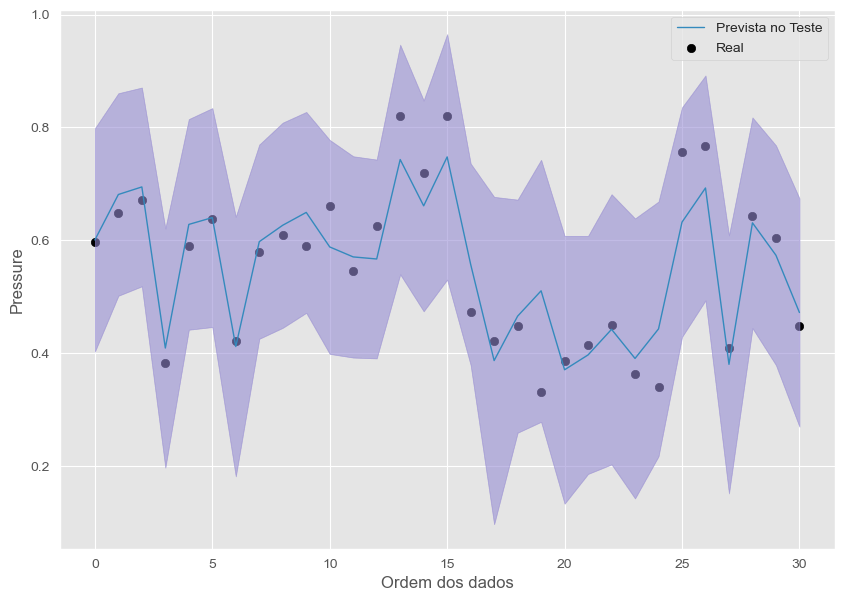

In [549]:
n = 31
t = range(n) 
mu = y_hat_test_mean
sigma = np.sqrt(y_hat_test_variance)

plt.style.use("ggplot")
f = plt.figure(figsize=(10,7))
plt.plot(t, mu, label="Prevista no Teste", color="C1", lw=1)
plt.scatter(t, y_test, color="black", label="Real")

for shade in range(1, 5):
    plt.fill_between(t, mu+sigma*2, mu-sigma * 2, alpha=0.2, color="C2")

plt.ylabel("Pressure")
plt.xlabel("Ordem dos dados")
plt.legend(loc="best")
f.savefig("rnn_demanda_test.png")
plt.show()

In [550]:
df_n.rename(columns={
    0: 'Frequency',1:'Angle',2:'Length',3:'Velocity',4:'Suction Side',5:'Pressure'
   
},inplace=True)

In [551]:
correlation= df_n.corr()

In [552]:
correlation

,Frequency,Angle,Length,Velocity,Suction Side,Pressure
Frequency,1.000000,-0.272765,-0.003661,0.133664,-0.230107,-0.390711
Angle,-0.272765,1.000000,-0.504868,0.058760,0.753394,-0.156108
Length,-0.003661,-0.504868,1.000000,0.003787,-0.220842,-0.236162
Velocity,0.133664,0.058760,0.003787,1.000000,-0.003974,0.125103
Suction Side,-0.230107,0.753394,-0.220842,-0.003974,1.000000,-0.312670
Pressure,-0.390711,-0.156108,-0.236162,0.125103,-0.312670,1.000000


In [553]:
r_as=correlation['Angle']['Suction Side']

In [554]:
r_al=correlation['Angle']['Length']

<AxesSubplot:>

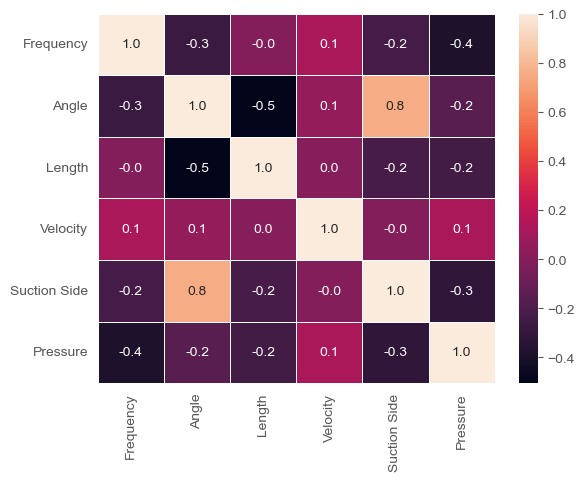

In [555]:
plot = sns.heatmap(correlation, annot = True, fmt=".1f", linewidths=.6)

plot

In [556]:
#incerteza com correlação 

In [557]:
df.total['ucc']=2*((df.total['c1']*upx1)**2+
                   (df.total['c2']*upx2)**2+
                   (df.total['c3']*upx3)**2+
                   (df.total['c4']*upx4)**2+
                   (df.total['c5']*upx5)**2+
                   2*df.total['c1']*df.total['c5']*upx1*upx5*r_as+
                   2*df.total['c1']*df.total['c2']*upx1*upx2*r_al+
                   (ea/(1500**0.5))**2)**0.5+ abs(es)

In [558]:
df.total

,5,Predict,Predict Deltax1,Predict Deltax2,Predict Deltax3,Predict Deltax4,Predict Deltax5,c1,c2,c3,c4,c5,uc,prediction error,ucc,uccpercent
0,0.596591,0.572977,0.572983,0.572977,0.572979,0.572977,0.572977,5.483627,-0.119209,1.549721,0.000000,0.000000,0.004276,-0.023614,0.007404,19.765144
1,0.648363,0.703849,0.703849,0.703850,0.703849,0.703850,0.703849,-0.298023,0.298023,-0.298023,0.059605,-0.536442,0.027136,0.055486,0.031191,16.550819
2,0.671870,0.702290,0.702290,0.702290,0.702290,0.702290,0.702290,0.238419,0.417233,-0.238419,0.000000,0.178814,0.009849,0.030420,0.013622,16.177078
3,0.383147,0.405478,0.405477,0.405478,0.405478,0.405478,0.405477,-0.685453,-0.208616,-0.089407,0.119209,-0.745058,0.037489,0.022331,0.041634,29.454779
4,0.590555,0.646232,0.646231,0.646232,0.646232,0.646232,0.646231,-1.013279,-0.298023,-0.238419,0.178814,-1.251698,0.062742,0.055677,0.066973,20.106337
5,0.638046,0.660783,0.660779,0.660783,0.660783,0.660783,0.660781,-4.112720,0.000000,-0.238419,0.178814,-1.430511,0.071663,0.022737,0.076306,20.371769
6,0.420906,0.405129,0.405129,0.405129,0.405129,0.405130,0.405128,-0.834465,-0.417233,-0.178814,0.059605,-1.609325,0.080574,-0.015776,0.084797,34.486153
7,0.579068,0.591111,0.591114,0.591111,0.591111,0.591111,0.591112,3.635883,0.178814,-0.059605,0.000000,0.894070,0.044889,0.012043,0.049432,20.647076
8,0.609434,0.655338,0.655335,0.655338,0.655338,0.655338,0.655338,-3.635883,-0.119209,-0.119209,0.119209,-0.298023,0.015489,0.045904,0.019843,17.435411
9,0.590342,0.684278,0.684275,0.684278,0.684278,0.684278,0.684277,-2.503395,-0.119209,-0.238419,0.119209,-0.476837,0.024210,0.093936,0.028527,16.926182


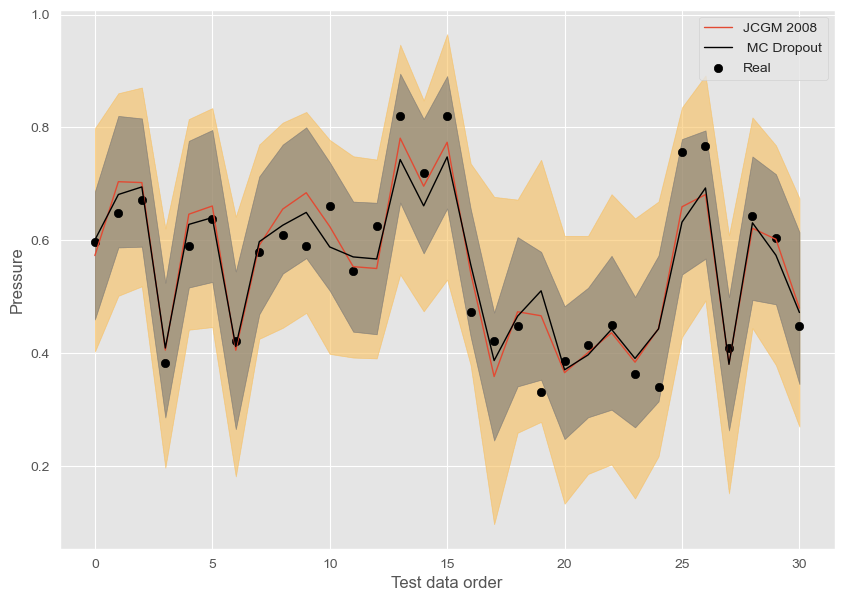

In [561]:
n = 31
t = range(n) 

plt.style.use("ggplot")
f = plt.figure(figsize=(10,7))
plt.plot(t, df.total['Predict'], label="JCGM 2008", color="C7", lw=1)
plt.plot(t, mu, label=" MC Dropout", color="Black", lw=1)
for shade in range(1, 5):
    plt.fill_between(t, mu+sigma*2, mu-sigma * 2, alpha=0.2, color="C11")
for shade in range(1, 5):
    plt.fill_between(t, dfb['Predict']-dfb['ucc'], dfb['Predict']+dfb['ucc'], alpha=0.2, color="C3")

plt.scatter(t, df.total[5], color="black", label="Real")
plt.ylabel("Pressure")
plt.xlabel("Test data order")
plt.legend(loc="best")
f.savefig("rnn_demanda_test3.png")
plt.show()